<a href="https://colab.research.google.com/github/fernandovieira1/ML-e-DS-com-Python-de-A-a-Z/blob/master/parte1_classif_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## census

In [1]:
from sklearn.svm import SVC

In [2]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import pickle
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [5]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [6]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [19]:
svm_census = SVC(kernel='linear', random_state=1, C=1) # definicao de kernel (modelo matematico) e C (valor de custo) sao criticos
svm_census.fit(x_census_treinamento, y_census_treinamento)

SVC(C=1, kernel='linear', random_state=1)

In [20]:
previsoes = svm_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [21]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [22]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

In [23]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



0.8507676560900717

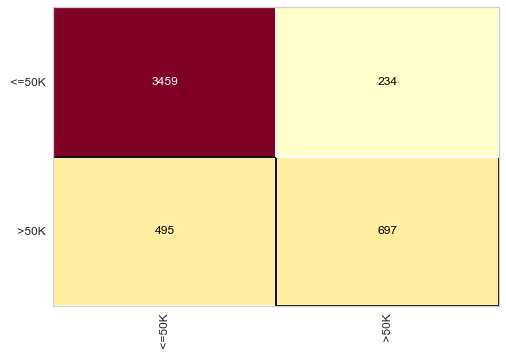

In [24]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)